Tabla de datos:

    C (nF)  V_exp_multimetro  V_exp_err_multimetro  V_exp_osciloscopio  \
0    100.0             0.160                 0.008                0.16   
1     90.0             0.172                 0.008                0.16   
2     80.0             0.194                 0.009                0.20   
3     70.0             0.220                 0.010                0.21   
4     60.0             0.260                 0.010                0.25   
5     50.0             0.300                 0.010                0.30   
6     40.0             0.350                 0.020                0.35   
7     30.0             0.450                 0.020                0.44   
8     20.0             0.600                 0.030                0.60   
9     10.0             0.800                 0.040                0.80   
10     0.0             0.990                 0.040                1.00   

    V_exp_err_osciloscopio     V_teo  delta_exp  delta_exp_err  delta_teo  
0                 

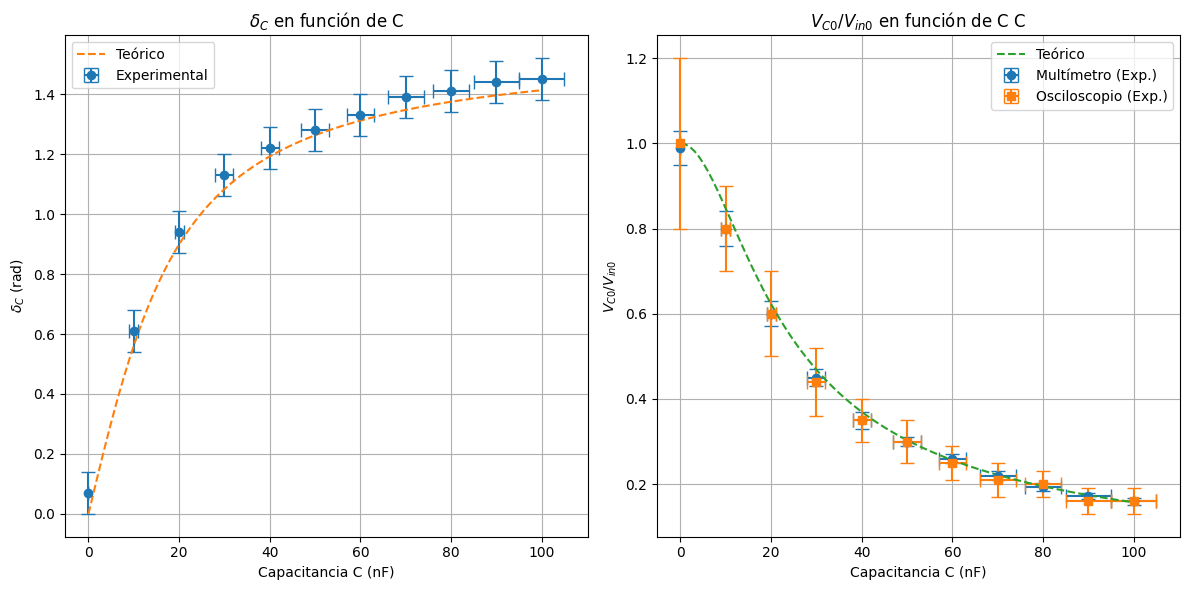

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos experimentales
C = np.array([100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]) * 1e-9  # Capacitancia (F)
C_error = np.array([5,5,4,4,3,3,2,2,1,1,0])
V_exp_multimetro = np.array([0.160, 0.172, 0.194, 0.22, 0.26, 0.30, 0.35, 0.45, 0.60, 0.80, 0.99])  # Multímetro
V_exp_osciloscopio = np.array([0.16, 0.16, 0.20, 0.21, 0.25, 0.30, 0.35, 0.44, 0.60, 0.80, 1.0])  # Osciloscopio
V_exp_err_multimetro = np.array([0.008, 0.008, 0.009, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.04, 0.04])
V_exp_err_osciloscopio = np.array([0.03, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.08, 0.1, 0.1, 0.2])

delta_exp = np.array([1.45, 1.44, 1.41, 1.39, 1.33, 1.28, 1.22, 1.13, 0.94, 0.61, 0.07])  # Desfase experimental
delta_exp_err = np.array([0.07] * len(C))  # Error en desfase

# Constantes
R = 10e3  # Resistencia en ohmios
R_err = 0.5e3  # Error en resistencia
f = 1000  # Frecuencia en Hz
omega = 2 * np.pi * f  # Frecuencia angular

# Función teórica para V_C0 / V_in0
def V_theoretical(C, R, omega):
    return 1 / np.sqrt(1 + (omega * R * C)**2)

# Función teórica para delta_C
def delta_theoretical(C, R, omega):
    return np.arctan(R * omega * C)

# Crear un rango más denso para C (100 puntos entre 0 y 100 nF)
C_theoretical = np.linspace(0, 100, 100) * 1e-9  # Capacitancia teórica en faradios (0 a 100 nF)

# Valores teóricos para C_theoretical
V_teo = V_theoretical(C_theoretical, R, omega)
delta_teo = delta_theoretical(C_theoretical, R, omega)

# Crear tabla con los datos
tabla = pd.DataFrame({
    'C (nF)': C * 1e9,
    'V_exp_multimetro': V_exp_multimetro,
    'V_exp_err_multimetro': V_exp_err_multimetro,
    'V_exp_osciloscopio': V_exp_osciloscopio,
    'V_exp_err_osciloscopio': V_exp_err_osciloscopio,
    'V_teo': V_teo[:len(C)],  # Tomar solo los primeros valores correspondientes a los puntos experimentales
    'delta_exp': delta_exp,
    'delta_exp_err': delta_exp_err,
    'delta_teo': delta_teo[:len(C)]  # Tomar solo los primeros valores correspondientes a los puntos experimentales
})

print("Tabla de datos:\n")
print(tabla)

# Gráficas
plt.figure(figsize=(12, 6))

# Gráfica 1: delta(C) vs C
plt.subplot(1, 2, 1)
plt.errorbar(C * 1e9, delta_exp, yerr=delta_exp_err, xerr=C_error, fmt='o', label='Experimental', capsize=5)
plt.plot(C_theoretical * 1e9, delta_teo, label='Teórico', linestyle='--')
plt.xlabel('Capacitancia C (nF)')
plt.ylabel(r'$\delta_C$ (rad)')
plt.title(r'$\delta_C$ en función de C')
plt.legend()
plt.grid()

# Gráfica 2: V_C0 / V_in0 vs C
plt.subplot(1, 2, 2)
plt.errorbar(C * 1e9, V_exp_multimetro, yerr=V_exp_err_multimetro,xerr=C_error, fmt='o', label='Multímetro (Exp.)', capsize=5)
plt.errorbar(C * 1e9, V_exp_osciloscopio, yerr=V_exp_err_osciloscopio,xerr=C_error, fmt='s', label='Osciloscopio (Exp.)', capsize=5)
plt.plot(C_theoretical * 1e9, V_teo, label='Teórico', linestyle='--')
plt.xlabel('Capacitancia C (nF)')
plt.ylabel('$V_{C0} / V_{in0}$')
plt.title('$V_{C0} / V_{in0}$ en función de C C')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


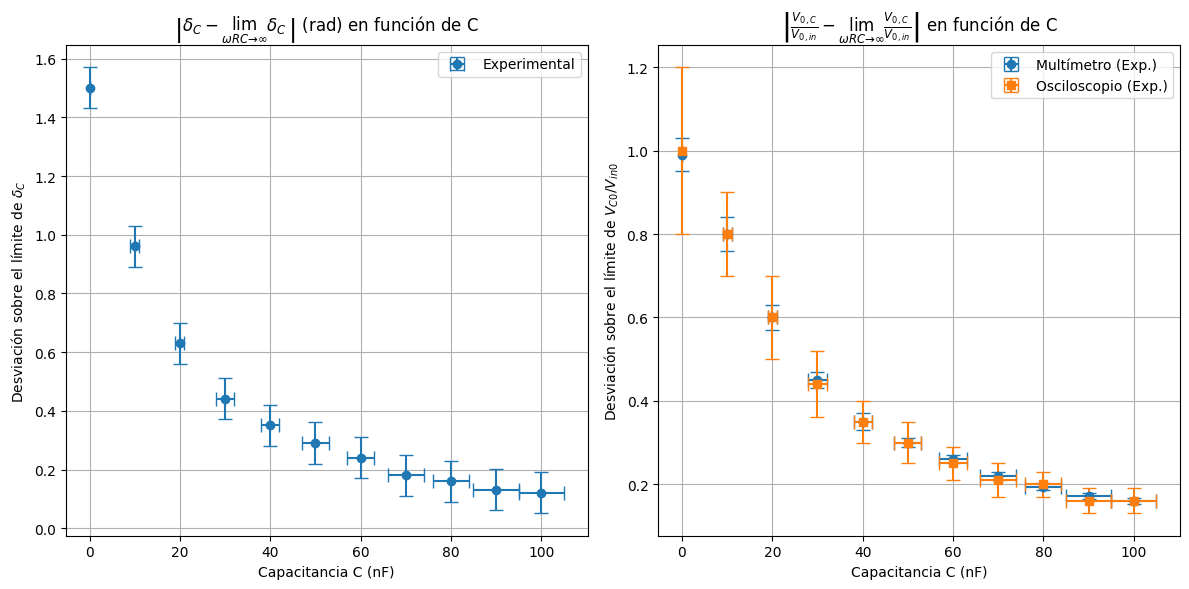

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos experimentales
C = np.array([100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]) * 1e-9  # Capacitancia (F)
V_exp_multimetro = np.array([0.160, 0.172, 0.194, 0.22, 0.26, 0.30, 0.35, 0.45, 0.60, 0.80, 0.99])  # Multímetro
V_exp_osciloscopio = np.array([0.16, 0.16, 0.20, 0.21, 0.25, 0.30, 0.35, 0.44, 0.60, 0.80, 1.0])  # Osciloscopio
V_exp_err_multimetro = np.array([0.008, 0.008, 0.009, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.04, 0.04])
V_exp_err_osciloscopio = np.array([0.03, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.08, 0.1, 0.1, 0.2])

delta_exp = np.array([1.45, 1.44, 1.41, 1.39, 1.33, 1.28, 1.22, 1.13, 0.94, 0.61, 0.07])  # Desfase experimental
delta_exp_err = np.array([0.07] * len(C))  # Error en desfase

# Constantes
R = 10e3  # Resistencia en ohmios
R_err = 0.5e3  # Error en resistencia
f = 1000  # Frecuencia en Hz
omega = 2 * np.pi * f  # Frecuencia angular




# Crear tabla con los datos
tabla = pd.DataFrame({
    'C (nF)': C * 1e9,
    'V_exp_multimetro': V_exp_multimetro,
    'V_exp_err_multimetro': V_exp_err_multimetro,
    'V_exp_osciloscopio': V_exp_osciloscopio,
    'V_exp_err_osciloscopio': V_exp_err_osciloscopio,
    'delta_exp': delta_exp,
    'delta_exp_err': delta_exp_err,
})



# Gráficas
plt.figure(figsize=(12, 6))

# Gráfica 1: delta(C) vs C
plt.subplot(1, 2, 1)
plt.errorbar(C * 1e9, np.abs(delta_exp - np.pi/2), yerr=delta_exp_err,xerr=C_error, fmt='o', label='Experimental', capsize=5)
plt.xlabel('Capacitancia C (nF)')
plt.title(r'$ \left| \delta_C - \lim_{\omega RC \rightarrow \infty}\delta_C \right|$ (rad) en función de C')
plt.ylabel(r'Desviación sobre el límite de $\delta_C$')
plt.legend()
plt.grid()

# Gráfica 2: V_C0 / V_in0 vs C
plt.subplot(1, 2, 2)
plt.errorbar(C * 1e9, V_exp_multimetro, yerr=V_exp_err_multimetro,xerr=C_error, fmt='o', label='Multímetro (Exp.)', capsize=5)
plt.errorbar(C * 1e9, V_exp_osciloscopio, yerr=V_exp_err_osciloscopio,xerr=C_error, fmt='s', label='Osciloscopio (Exp.)', capsize=5)
plt.xlabel('Capacitancia C (nF)')
plt.title(r'$\left|\frac{V_{0,C}}{V_{0,in}} - \lim_{\omega RC \rightarrow \infty} \frac{V_{0,C}}{V_{0,in}} \right|$ en función de C')
plt.ylabel(r'Desviación sobre el límite de $V_{C0} / V_{in0}$')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()
